In [108]:
import pandas as pd
import data_cleanup as dc
import date_processing as dp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import the date module
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
sns.set_palette("husl")


In [91]:
toronto_weather = pd.read_csv('./kaggle_data/toronto.csv')

In [92]:
chievres_weather = pd.read_csv('./kaggle_data/chievres.csv')

In [110]:

chievres_toronto_weather = pd.DataFrame({"Toronto_temp": toronto_weather['tavg'], "Chievres_temp": chievres_weather['tavg']}).dropna()
corr = chievres_toronto_weather.corr(method="pearson")

x = chievres_toronto_weather["Chievres_temp"].values
y = chievres_toronto_weather["Toronto_temp"].values

a, b = np.polyfit(x,y,1)

print(f"Toronto ≈ {a:.2f} × Chievres + ({b:.2f})")


Toronto ≈ 1.23 × Chievres + (-3.68)


In [93]:
energy_data = pd.read_csv('./kaggle_data/energy_data.csv')

In [ ]:
toronto_weather = dc.remove_null_columns(toronto_weather)
chievres_weather = dc.remove_null_columns(chievres_weather)
energy_data = dc.remove_null_columns(energy_data)
print("Datasets cleaned - null columns removed!")

Datasets cleaned - null columns removed!


In [95]:
# Convert date columns to datetime
toronto_weather = dp.col_to_date(toronto_weather, "date")
chievres_weather = dp.col_to_date(chievres_weather, "date")
energy_data = dp.col_to_date(energy_data, "date")

print("Date columns converted to datetime!")


Date columns converted to datetime!


In [96]:
toronto_weather = dp.strip_date_components(toronto_weather, "date", "month")
chievres_weather = dp.strip_date_components(chievres_weather, "date", "month")
energy_data = dp.strip_date_components(energy_data, "date", "month")


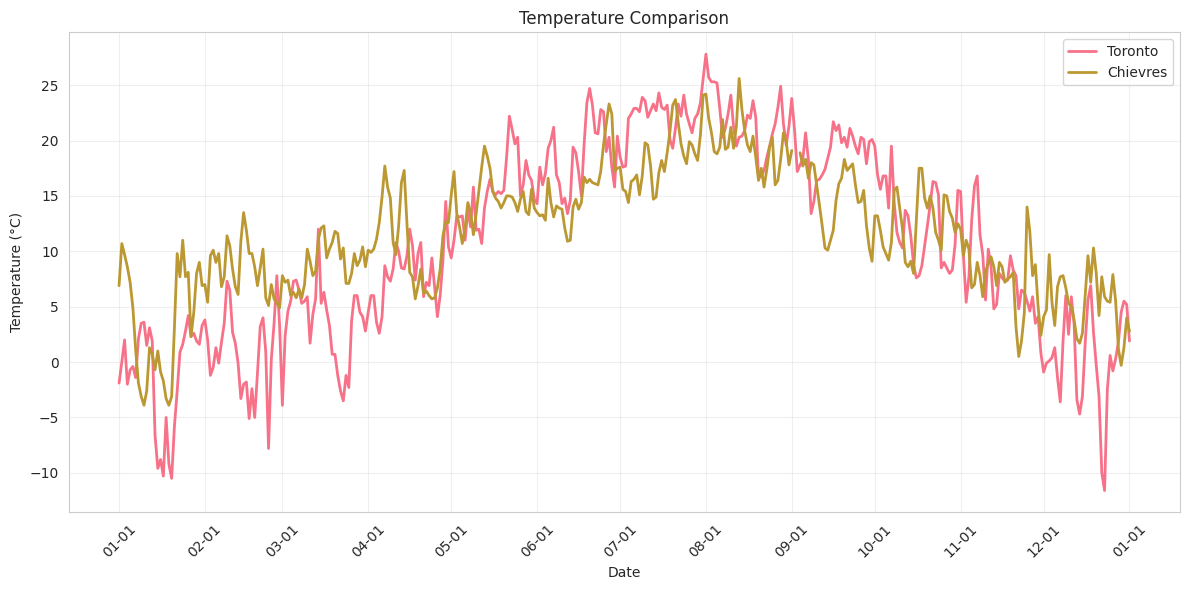

In [97]:
plt.figure(figsize=(12, 6))

# Plot your data
plt.plot(toronto_weather["date"], toronto_weather["tavg"], label="Toronto", linewidth=2)
plt.plot(
    chievres_weather["date"], chievres_weather["tavg"], label="Chievres", linewidth=2
)

# Format dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.title("Temperature Comparison")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


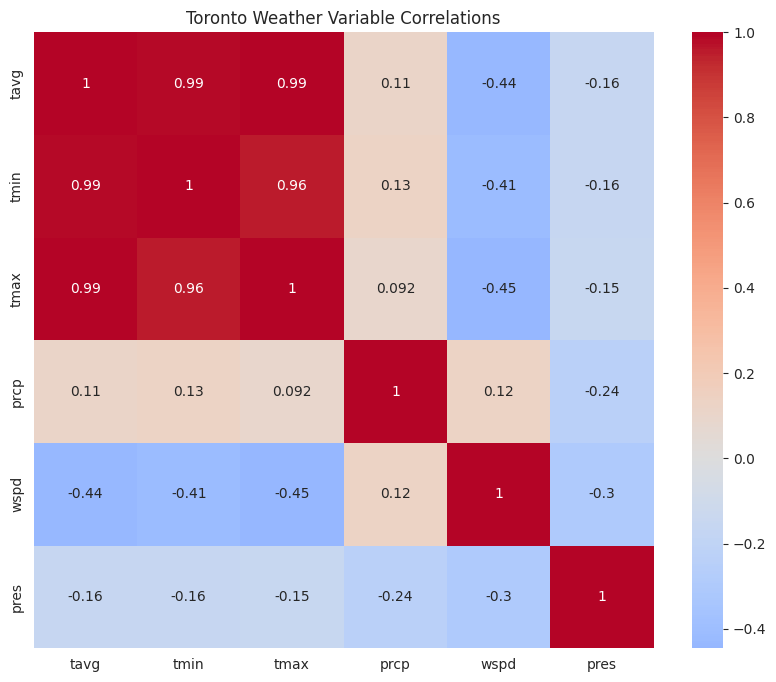

In [98]:
plt.figure(figsize=(10, 8))
correlation_matrix = toronto_weather[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Toronto Weather Variable Correlations')
plt.show()

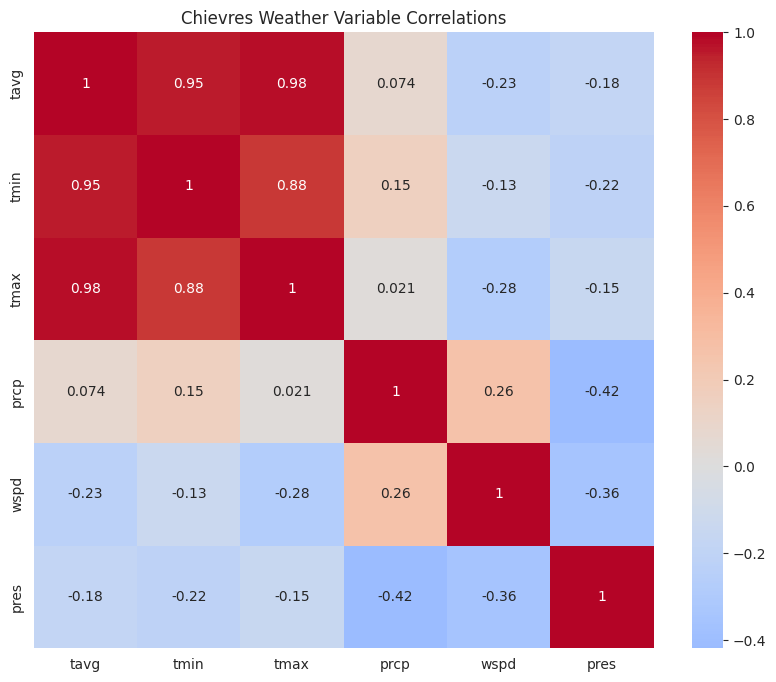

In [99]:
plt.figure(figsize=(10, 8))
correlation_matrix = chievres_weather[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Chievres Weather Variable Correlations')
plt.show()

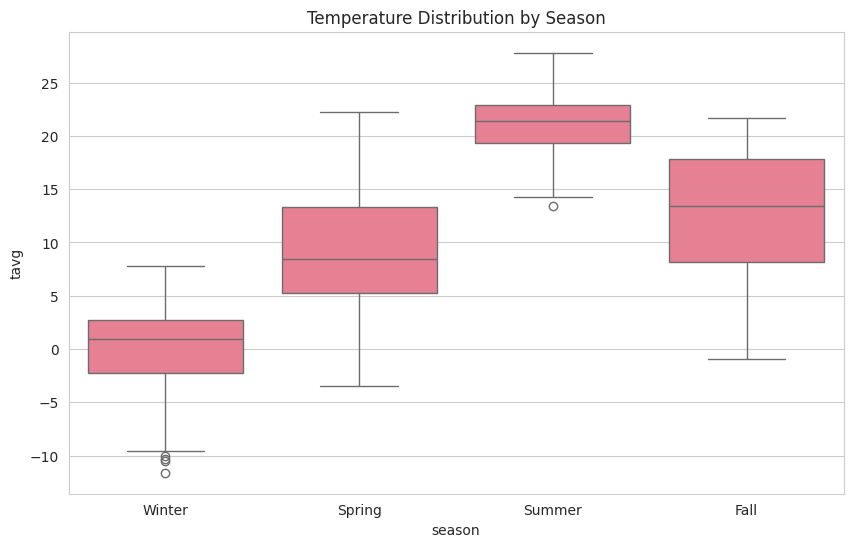

In [100]:
toronto_weather['month'] = toronto_weather['date'].str.split('-').str[0].astype(int)

toronto_weather['season'] = toronto_weather['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=toronto_weather, x='season', y='tavg')
plt.title('Temperature Distribution by Season')
plt.show()

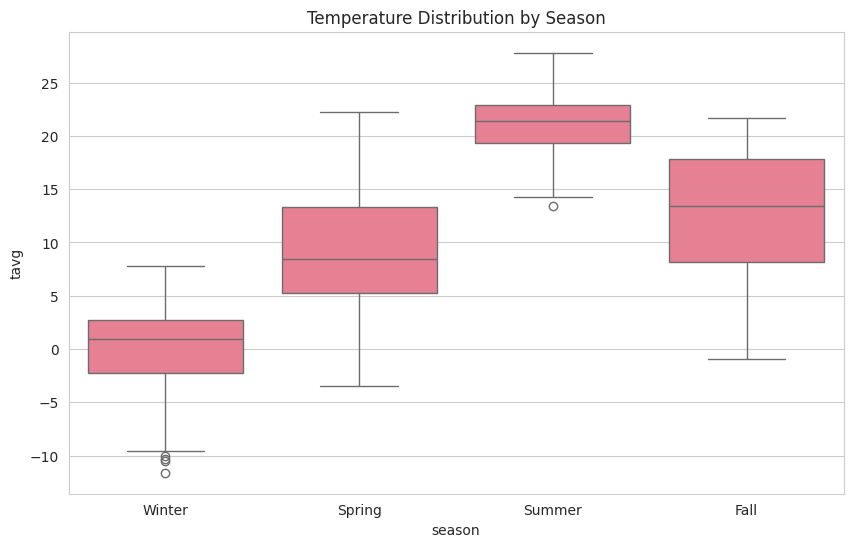

In [101]:
chievres_weather['month'] = chievres_weather['date'].str.split('-').str[0].astype(int)

chievres_weather['season'] = chievres_weather['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=toronto_weather, x='season', y='tavg')
plt.title('Temperature Distribution by Season')
plt.show()

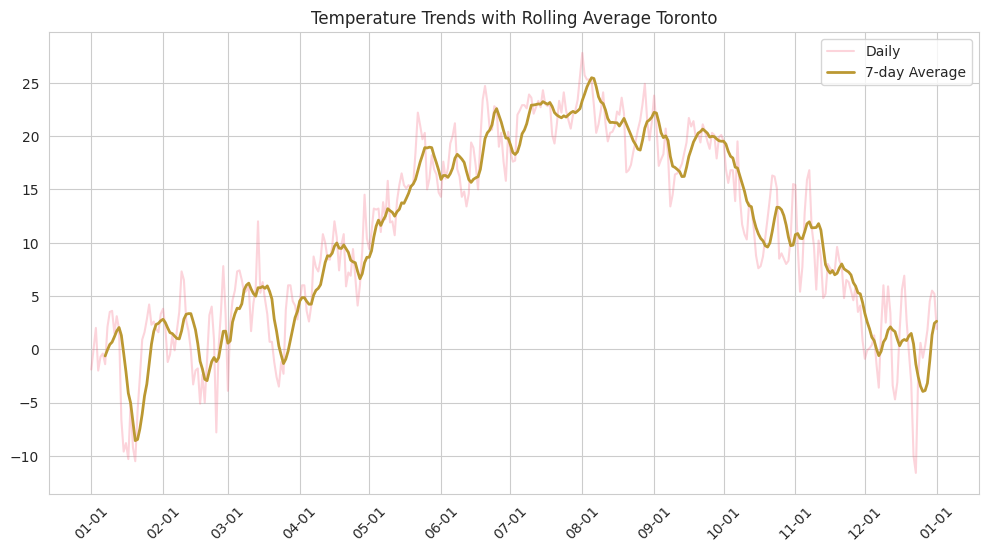

In [102]:
plt.figure(figsize=(12, 6))

plt.plot(toronto_weather['date'], toronto_weather['tavg'], alpha=0.3, label='Daily')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

rolling_avg = toronto_weather['tavg'].rolling(window=7).mean()
plt.plot(toronto_weather['date'], rolling_avg, linewidth=2, label='7-day Average')


plt.title('Temperature Trends with Rolling Average Toronto')
plt.legend()
plt.show()

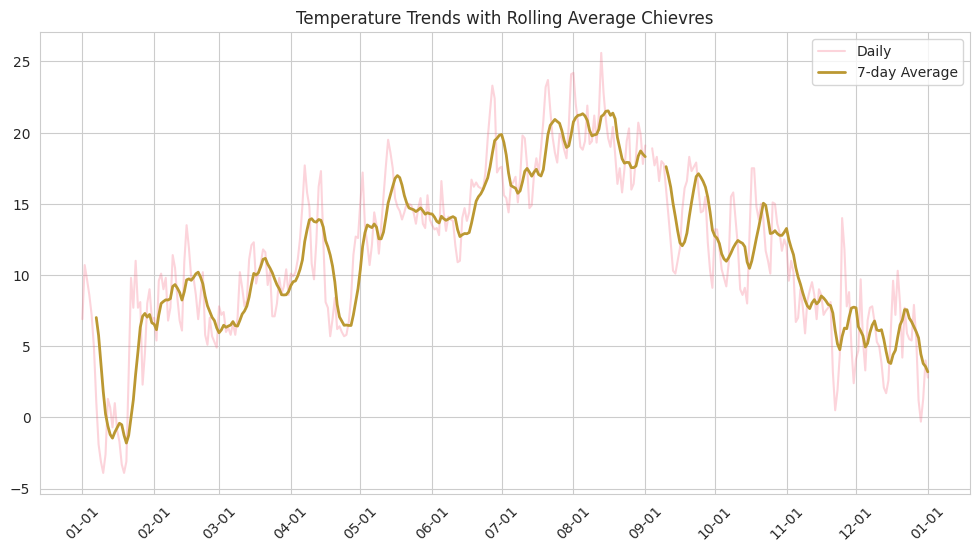

In [103]:

plt.figure(figsize=(12, 6))

plt.plot(chievres_weather['date'], chievres_weather['tavg'], alpha=0.3, label='Daily')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

rolling_avg = chievres_weather['tavg'].rolling(window=7).mean()
plt.plot(chievres_weather['date'], rolling_avg, linewidth=2, label='7-day Average')

plt.title('Temperature Trends with Rolling Average Chievres')
plt.legend()
plt.show()